In [607]:
import pandas as pd
import numpy as np

In [608]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [609]:
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from statsmodels.tsa.arima.model import ARIMA

In [610]:
# 1. Data Collection
def get_stock_data(symbol, start_date, end_date):
    try:
         # Convert date inputs to datetime objects to ensure consistency
        start_date = datetime.strptime(start_date, '%Y-%m-%d') if isinstance(start_date, str) else start_date
        end_date = datetime.strptime(end_date, '%Y-%m-%d') if isinstance(end_date, str) else end_date
        
        stock = yf.Ticker(symbol)
        df = stock.history(start=start_date, end=end_date)
        if df.empty:
            raise ValueError(f"No data found for {symbol} between {start_date} and {end_date}")
        return df
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None

# Example usage
symbol = "RELIANCE.NS"  # Reliance Industries (Indian stock)
start_date = "2021-01-01"
end_date = "2023-12-31"
df = get_stock_data(symbol, start_date, end_date)

In [611]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-01 00:00:00+05:30,1810.043182,1818.237552,1804.580309,1809.588013,5007587,0.0,0.0
2021-01-04 00:00:00+05:30,1816.507724,1819.967492,1791.833579,1812.638184,12256767,0.0,0.0
2021-01-05 00:00:00+05:30,1792.743736,1806.036842,1780.907412,1790.103394,12061545,0.0,0.0
2021-01-06 00:00:00+05:30,1789.921213,1790.012247,1734.609372,1742.894775,23200734,0.0,0.0
2021-01-07 00:00:00+05:30,1748.585253,1770.892154,1734.609393,1740.072266,16162959,0.0,0.0


In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2021-01-01 00:00:00+05:30 to 2023-12-29 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          741 non-null    float64
 1   High          741 non-null    float64
 2   Low           741 non-null    float64
 3   Close         741 non-null    float64
 4   Volume        741 non-null    int64  
 5   Dividends     741 non-null    float64
 6   Stock Splits  741 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 46.3 KB


In [613]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,741.000000,741.000000,741.000000,741.000000,7.410000e+02,741.000000,741.0
mean,2213.263292,2234.317632,2191.091769,2212.021390,7.554288e+06,0.032389,0.0
std,213.849802,214.767120,213.439832,214.462793,4.429879e+06,0.510991,0.0
min,1692.954790,1734.472842,1666.186423,1677.066772,8.528280e+05,0.000000,0.0
25%,2110.551387,2143.442975,2080.772200,2113.679443,4.888494e+06,0.000000,0.0
50%,2254.726559,2276.612037,2233.026018,2252.122803,6.401669e+06,0.000000,0.0
75%,2368.505447,2388.762936,2345.773032,2369.055176,8.829271e+06,0.000000,0.0
max,2609.546293,2617.922944,2578.100118,2604.952393,4.573099e+07,9.000000,0.0


In [614]:
# 2. Data Preprocessing
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

In [615]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

In [616]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,1810.043182,1818.237552,1804.580309,1809.588013,5007587,0.0,0.0,2021-01-01
1,1816.507724,1819.967492,1791.833579,1812.638184,12256767,0.0,0.0,2021-01-04
2,1792.743736,1806.036842,1780.907412,1790.103394,12061545,0.0,0.0,2021-01-05
3,1789.921213,1790.012247,1734.609372,1742.894775,23200734,0.0,0.0,2021-01-06
4,1748.585253,1770.892154,1734.609393,1740.072266,16162959,0.0,0.0,2021-01-07


In [617]:
# Check for missing values
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Date            0
dtype: int64

In [618]:
# Fill missing values using forward fill
df.fillna(method='ffill', inplace=True)

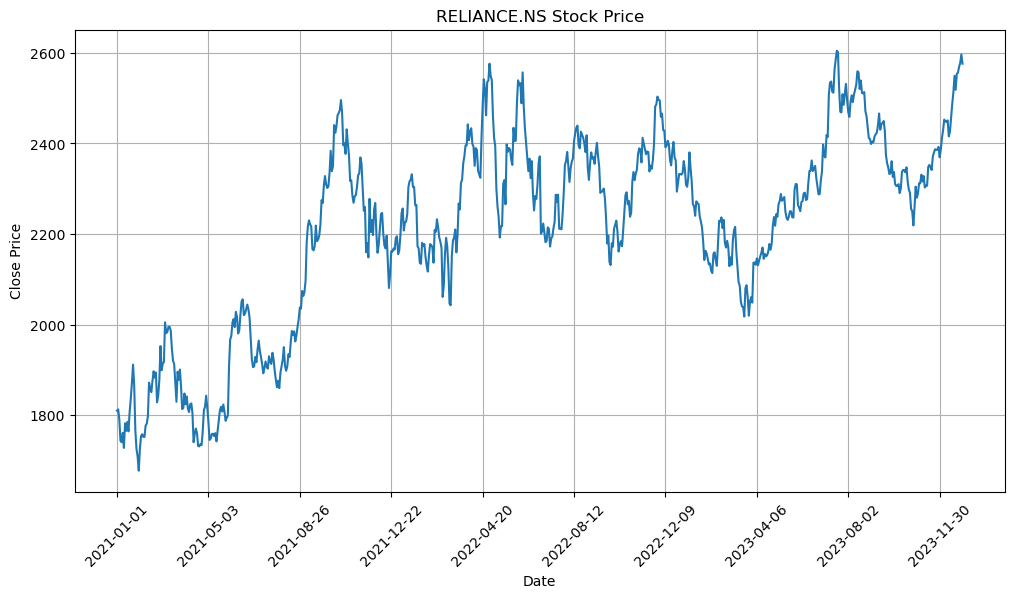

In [619]:
# 3. Exploratory Data Analysis

# Closing Price Trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])

plt.title(f'{symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=12))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

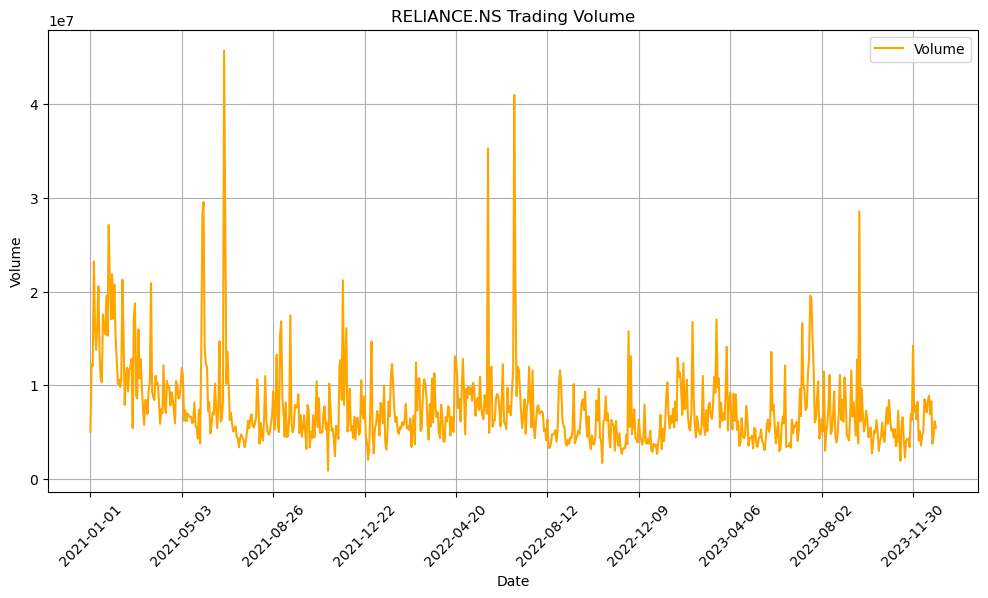

In [620]:
# Plot Volume
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title(f"{symbol} Trading Volume")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=12))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

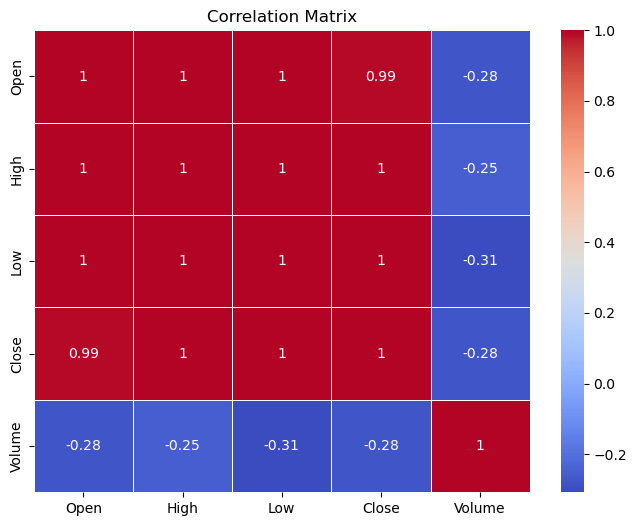

In [621]:
# Compute the correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [622]:
# 4. Feature Engineering
df['MA50'] = df['Close'].rolling(window=50).mean()

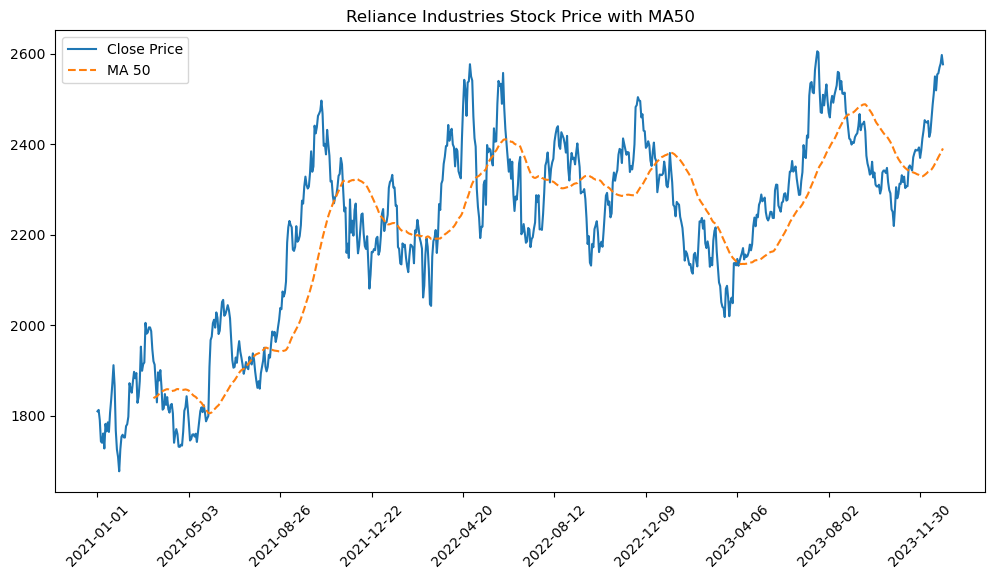

In [623]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA50'], label='MA 50', linestyle='--')
plt.title('Reliance Industries Stock Price with MA50')
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=12))
plt.xticks(rotation=45)
plt.show()

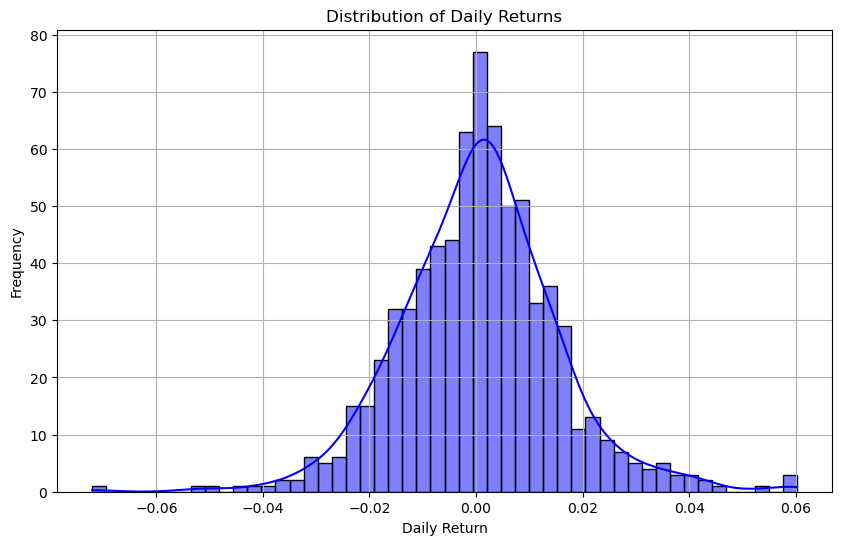

In [624]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Daily return histplot
plt.figure(figsize=(10,6))
sns.histplot(df['Daily_Return'].dropna(), bins=50, color='blue',kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [625]:
daily_return_mean = df['Daily_Return'].mean()
daily_return_std = df['Daily_Return'].std()
print(f"Mean Daily Return: {daily_return_mean:.4f}")
print(f"Standard Deviation of Daily Return: {daily_return_std:.4f}")


Mean Daily Return: 0.0006
Standard Deviation of Daily Return: 0.0149


In [626]:
df.isna().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Date             0
MA50            49
Daily_Return     1
dtype: int64

In [627]:
# Fill missing MA50 values with the previous value or drop if not needed
df['MA50'].fillna(method='bfill', inplace=True)  # Forward fill or use 'bfill' for backward fill

df['Daily_Return'].fillna(0, inplace=True)  # Fill missing values with 0 or another method


In [628]:
# Create lag features
df['Lag1'] = df['Close'].shift(1)  # Lag of 1 day
df['Lag2'] = df['Close'].shift(2)  # Lag of 2 days
df['Lag5'] = df['Close'].shift(5)  # Lag of 5 days

# Drop rows with NaN values (due to lagging)
df.dropna(inplace=True)


In [629]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Calculate RSI and add it to the DataFrame
df['RSI'] = calculate_rsi(df)

df.fillna(method='bfill', inplace=True)

In [630]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Date            0
MA50            0
Daily_Return    0
Lag1            0
Lag2            0
Lag5            0
RSI             0
dtype: int64

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 5 to 740
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          736 non-null    float64
 1   High          736 non-null    float64
 2   Low           736 non-null    float64
 3   Close         736 non-null    float64
 4   Volume        736 non-null    int64  
 5   Dividends     736 non-null    float64
 6   Stock Splits  736 non-null    float64
 7   Date          736 non-null    object 
 8   MA50          736 non-null    float64
 9   Daily_Return  736 non-null    float64
 10  Lag1          736 non-null    float64
 11  Lag2          736 non-null    float64
 12  Lag5          736 non-null    float64
 13  RSI           736 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 86.2+ KB


In [632]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [633]:

# Define features and target
X = df[['Lag1', 'Lag2', 'Lag5', 'MA50', 'RSI']]
y = df['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Print the shape of the datasets to confirm
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (515, 5)
Testing data shape: (221, 5)


In [634]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [635]:
y_pred = lm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1043.332470697597
R-squared Score: 0.9777707309628874


In [636]:
# Print model coefficients
coefficients = lm.coef_
feature_names = X.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print(coef_df)


  Feature  Coefficient
0    Lag1     0.921531
1    Lag2    -0.130057
2    Lag5     0.096048
3    MA50     0.109335
4     RSI     1.080798


In [637]:
# 6. ARIMA Model

In [638]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,MA50,Daily_Return,Lag1,Lag2,Lag5,RSI
5,1746.309160,1764.883072,1740.937321,1760.603760,13770093,0.0,0.0,2021-01-08,1838.327263,0.011799,1740.072266,1742.894775,1809.588013,0.000000
6,1765.247080,1765.247080,1723.091675,1727.416504,16653912,0.0,0.0,2021-01-11,1838.327263,-0.018850,1760.603760,1740.072266,1812.638184,0.000000
7,1732.651794,1784.549385,1729.829263,1781.863525,20580773,0.0,0.0,2021-01-12,1838.327263,0.031519,1727.416504,1760.603760,1790.103394,62.129823
8,1787.781802,1798.161346,1746.719038,1765.247314,13309729,0.0,0.0,2021-01-13,1838.327263,-0.009325,1781.863525,1727.416504,1742.894775,52.227114
9,1770.892138,1790.831798,1765.474782,1785.095703,10776621,0.0,0.0,2021-01-14,1838.327263,0.011244,1765.247314,1781.863525,1740.072266,59.867915


In [639]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [640]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,Daily_Return,Lag1,Lag2,Lag5,RSI
Date,,,,,,,,,,,,,
2021-01-08,1746.309160,1764.883072,1740.937321,1760.603760,13770093,0.0,0.0,1838.327263,0.011799,1740.072266,1742.894775,1809.588013,0.000000
2021-01-11,1765.247080,1765.247080,1723.091675,1727.416504,16653912,0.0,0.0,1838.327263,-0.018850,1760.603760,1740.072266,1812.638184,0.000000
2021-01-12,1732.651794,1784.549385,1729.829263,1781.863525,20580773,0.0,0.0,1838.327263,0.031519,1727.416504,1760.603760,1790.103394,62.129823
2021-01-13,1787.781802,1798.161346,1746.719038,1765.247314,13309729,0.0,0.0,1838.327263,-0.009325,1781.863525,1727.416504,1742.894775,52.227114
2021-01-14,1770.892138,1790.831798,1765.474782,1785.095703,10776621,0.0,0.0,1838.327263,0.011244,1765.247314,1781.863525,1740.072266,59.867915


In [641]:
from statsmodels.tsa.stattools import adfuller

# Assume you're using the 'Close' column for prediction
result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -2.284990920042165
p-value: 0.17685439994036933


In [642]:
df['Close_diff'] = df['Close'].diff().dropna()

# Check again for stationarity after differencing
result_diff = adfuller(df['Close_diff'].dropna())
print(f'ADF Statistic after differencing: {result_diff[0]}')
print(f'p-value after differencing: {result_diff[1]}')

ADF Statistic after differencing: -16.62530158735173
p-value after differencing: 1.684211943018158e-29


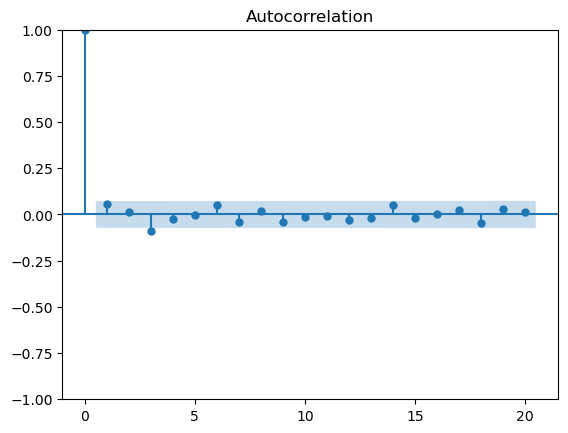

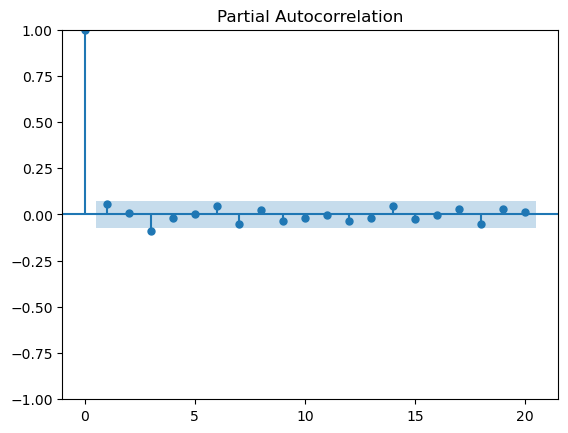

In [643]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF for the differenced data
plot_acf(df['Close_diff'].dropna(), lags=20)
plot_pacf(df['Close_diff'].dropna(), lags=20)
plt.show()

In [644]:
# Fit the ARIMA(0, 1, 0) model
model = ARIMA(df['Close'], order=(0, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  736
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3605.836
Date:                Thu, 19 Sep 2024   AIC                           7213.672
Time:                        22:02:18   BIC                           7218.272
Sample:                             0   HQIC                          7215.447
                                - 736                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1068.4074     39.480     27.062      0.000     991.029    1145.786
Ljung-Box (L1) (Q):                   2.34   Jarque-Bera (JB):               121.20
Prob(Q):                              0.13   Pr

In [645]:
# Assuming forecast is a pandas Series or numpy array
forecast = model_fit.forecast(steps=10)
forecast = np.array(forecast)  # Ensure forecast is a numpy array if it's not already

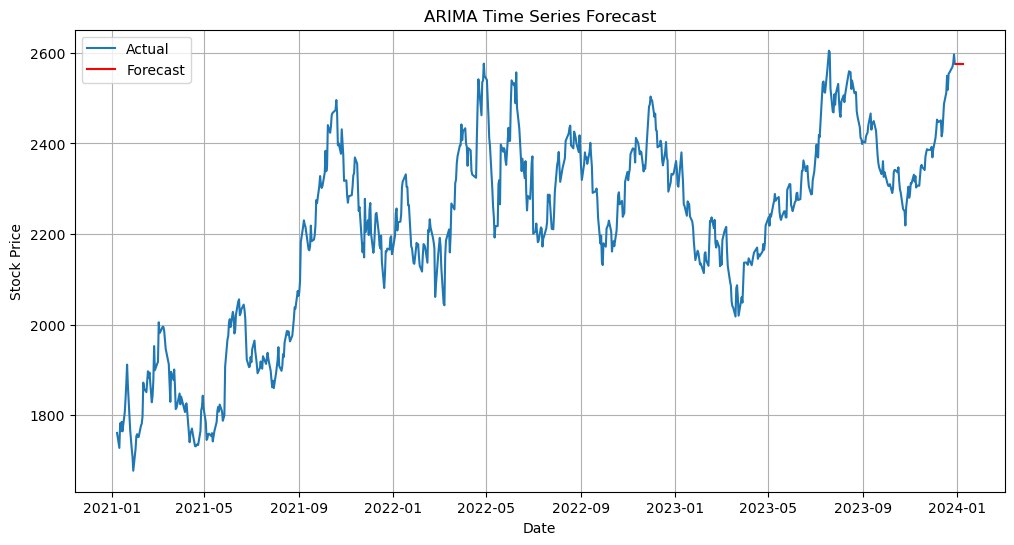

In [646]:
# Define the number of forecast periods
forecast_steps = len(forecast)

# Create the forecast index starting from the day after the last actual date
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(forecast_index, forecast, color='red', label='Forecast')
plt.title('ARIMA Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [648]:
 # Evaluate the model
# Use a portion of your data for testing
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit the model on training data
model_test = ARIMA(train['Close'], order=(p, d, q))
results_test = model_test.fit()

# Forecast for the test period
forecast_test = results_test.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Close'], forecast_test))
print(f'RMSE: {rmse}')

RMSE: 190.95401249597913


In [649]:
# Try ARIMA(1, 1, 0)
model_arima_1_1_0 = ARIMA(df['Close'], order=(1, 1, 0))
model_fit_arima_1_1_0 = model_arima_1_1_0.fit()
forecast_1_1_0 = model_fit_arima_1_1_0.forecast(steps=10)
print(forecast_1_1_0)

# Try ARIMA(0, 1, 1)
model_arima_0_1_1 = ARIMA(df['Close'], order=(0, 1, 1))
model_fit_arima_0_1_1 = model_arima_0_1_1.fit()
forecast_0_1_1 = model_fit_arima_0_1_1.forecast(steps=10)
print(forecast_0_1_1)


736    2575.027538
737    2574.959860
738    2574.955974
739    2574.955751
740    2574.955738
741    2574.955737
742    2574.955737
743    2574.955737
744    2574.955737
745    2574.955737
Name: predicted_mean, dtype: float64
736    2575.017
737    2575.017
738    2575.017
739    2575.017
740    2575.017
741    2575.017
742    2575.017
743    2575.017
744    2575.017
745    2575.017
Name: predicted_mean, dtype: float64


In [650]:
# -----------------------------------------SARIMA----------------------------------------------------

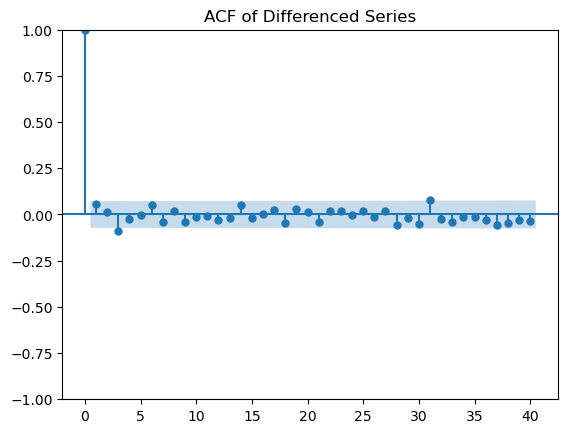

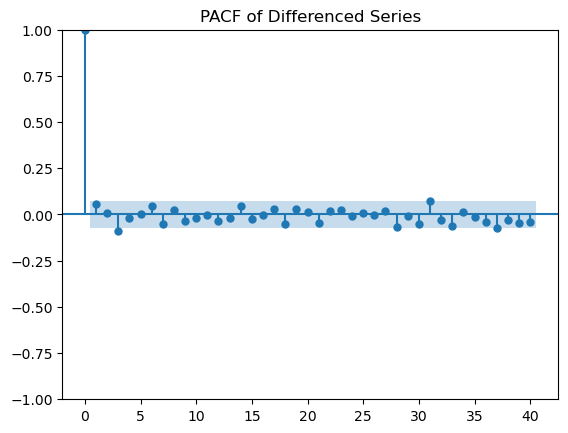

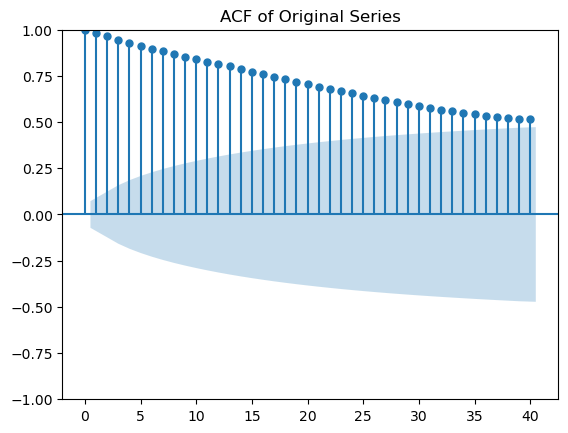

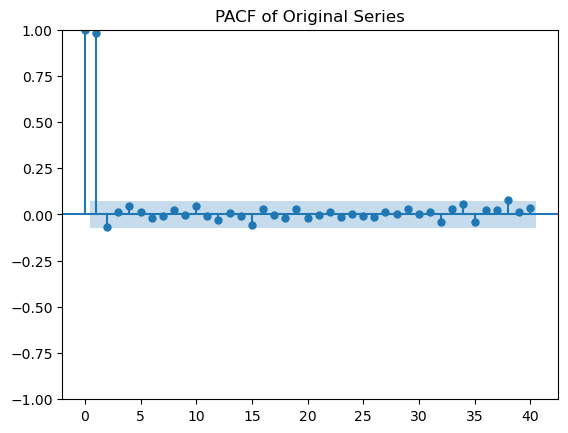

In [651]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for differenced data
plot_acf(df['Close_diff'].dropna(), lags=40)
plt.title('ACF of Differenced Series')
plt.show()

plot_pacf(df['Close_diff'].dropna(), lags=40)
plt.title('PACF of Differenced Series')
plt.show()

# For seasonal components
plot_acf(df['Close'].dropna(), lags=40)
plt.title('ACF of Original Series')
plt.show()

plot_pacf(df['Close'].dropna(), lags=40)
plt.title('PACF of Original Series')
plt.show()


In [652]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters
p, d, q = 1, 1, 1  # Non-seasonal orders
P, D, Q, s = 1, 1, 1, 5  # Seasonal orders and seasonal period (e.g., 12 for monthly data)

model_sarima = SARIMAX(df['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima = model.fit()

print(model_fit_sarima.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  736
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3605.836
Date:                Thu, 19 Sep 2024   AIC                           7213.672
Time:                        22:02:37   BIC                           7218.272
Sample:                             0   HQIC                          7215.447
                                - 736                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1068.4074     39.480     27.062      0.000     991.029    1145.786
Ljung-Box (L1) (Q):                   2.34   Jarque-Bera (JB):               121.20
Prob(Q):                              0.13   Pr

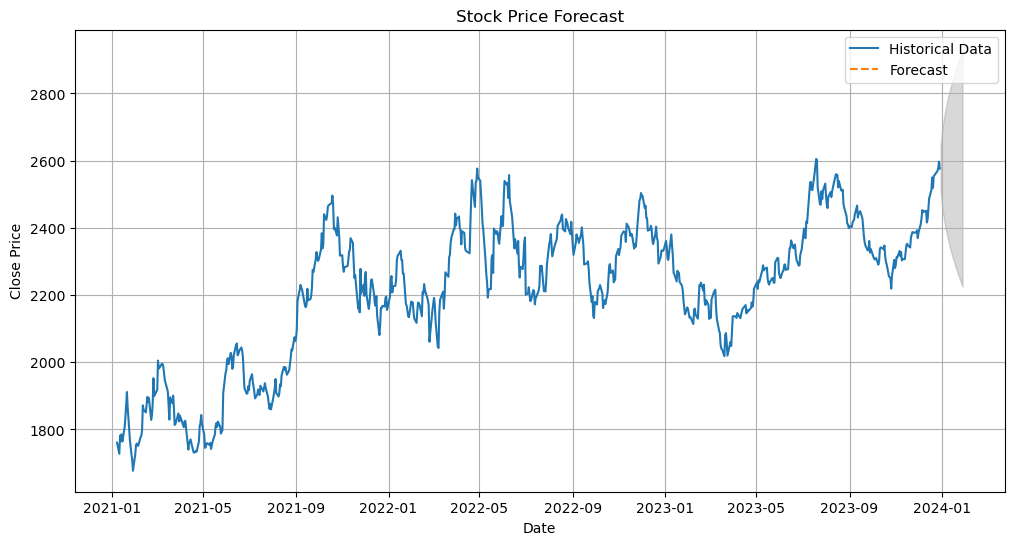

In [654]:
# Forecasting
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_conf_int = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Historical Data')
plt.plot(forecast_series, label='Forecast', linestyle='--')

# Plotting confidence intervals
plt.fill_between(forecast_series.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.3)

plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
